In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Cargar el dataset
data = pd.read_csv('winequality-red.csv')

# Punto 1: Análisis Exploratorio de Datos

In [3]:
# Visualizar las primeras filas
print("\nPrimeras 5 filas del dataset:")
print(data.head())


Primeras 5 filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

In [4]:
# Información general del dataset
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000  

In [6]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


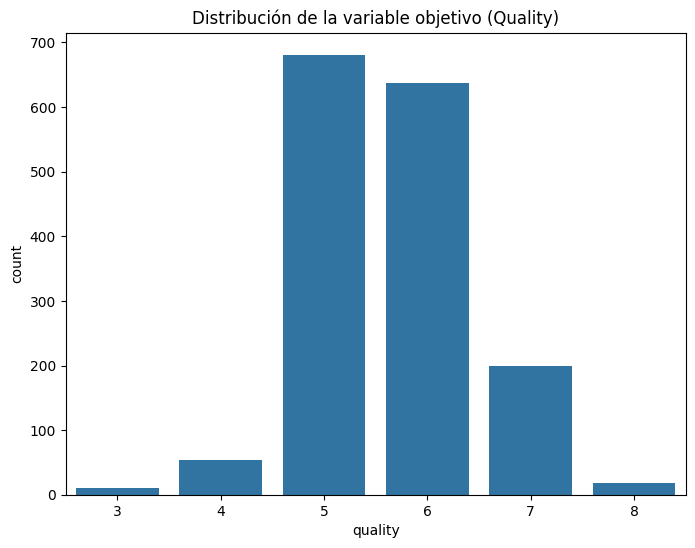

In [7]:
# Distribución de la variable objetivo (quality)
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribución de la variable objetivo (Quality)')
plt.show()

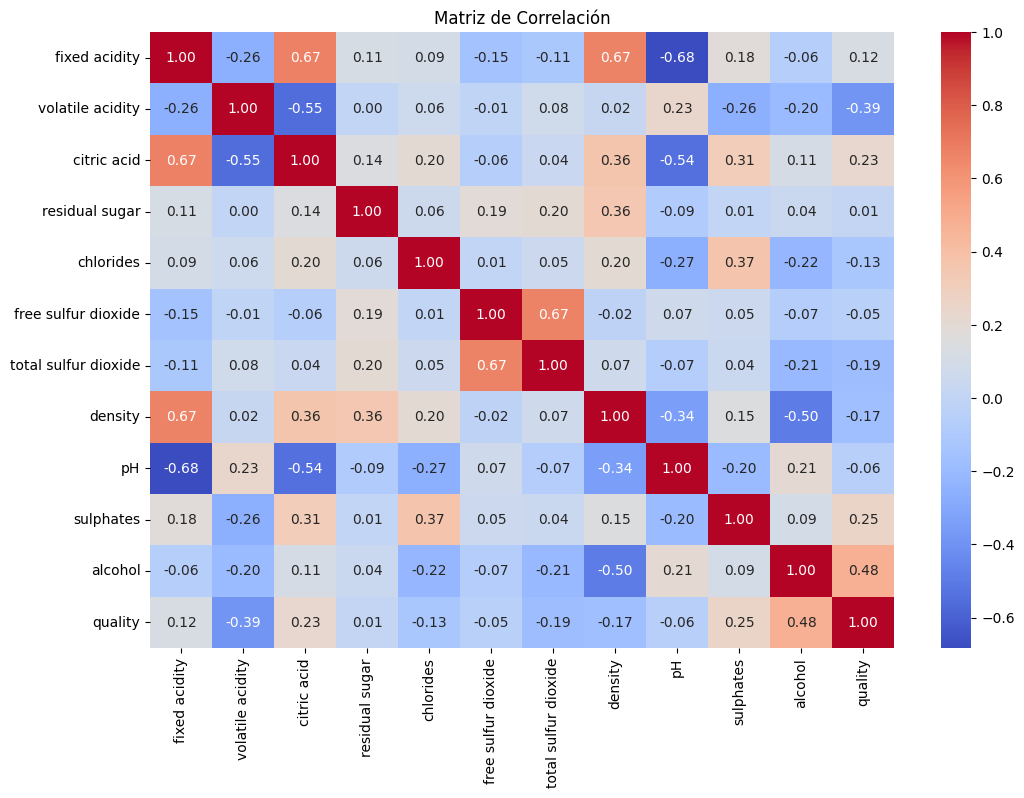

In [8]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

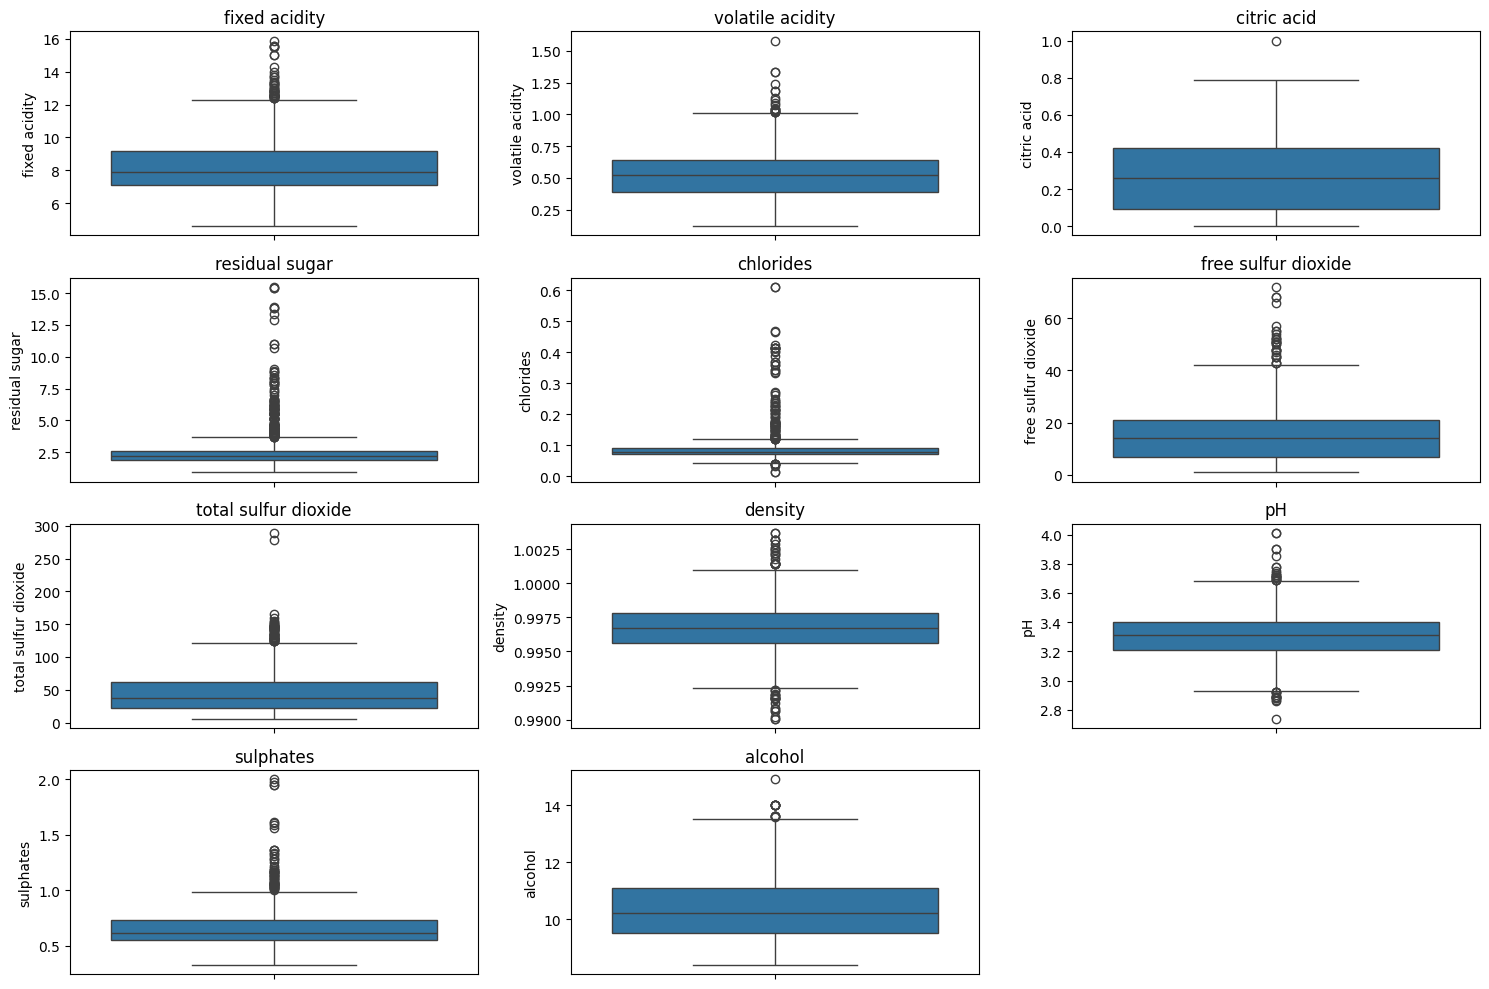

In [9]:
# Boxplots para detectar valores atípicos
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Punto 2: Preprocesamiento de Datos

In [10]:
# No hay valores nulos según el análisis previo, pero verificamos nuevamente
if data.isnull().sum().sum() == 0:
    print("No hay valores nulos en el dataset.")
else:
    data = data.fillna(data.mean())
    print("Valores nulos rellenados con la media.")

No hay valores nulos en el dataset.


In [11]:
# Transformar la variable objetivo en categorías (por ejemplo, binarizar: bueno/malo)
# Suponemos que quality >= 7 es "bueno" (1) y < 7 es "malo" (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)
print("\nDistribución de la variable objetivo binarizada:")
print(data['quality'].value_counts())


Distribución de la variable objetivo binarizada:
quality
0    1382
1     217
Name: count, dtype: int64


In [12]:
# Escalar las características numéricas
scaler = StandardScaler()
features = data.drop('quality', axis=1)
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['quality'] = data['quality']

# Punto 3: Selección de Características

In [13]:
# Seleccionar las mejores características usando SelectKBest
X = scaled_data.drop('quality', axis=1)
y = scaled_data['quality']
selector = SelectKBest(score_func=f_classif, k=8)  # Seleccionamos las 8 mejores
X_selected = selector.fit_transform(X, y)

In [14]:
# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()].tolist()
print("Características seleccionadas:", selected_features)

Características seleccionadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [15]:
# Crear un nuevo dataset con las características seleccionadas
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Punto 4: Dividir el Dataset en Train y Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42, stratify=y)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1279, 8)
Tamaño del conjunto de prueba: (320, 8)


# Punto 5: Entrenar el Modelo

In [17]:
# Configurar el modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros para GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar búsqueda de hiperparámetros
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Punto 6: Evaluación del Modelo

In [18]:
# Predicciones
y_pred = best_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precisión (Accuracy): 0.925
Precisión (Precision): 0.7567567567567568
Recall: 0.6511627906976745
F1-Score: 0.7


In [19]:
# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.76      0.65      0.70        43

    accuracy                           0.93       320
   macro avg       0.85      0.81      0.83       320
weighted avg       0.92      0.93      0.92       320



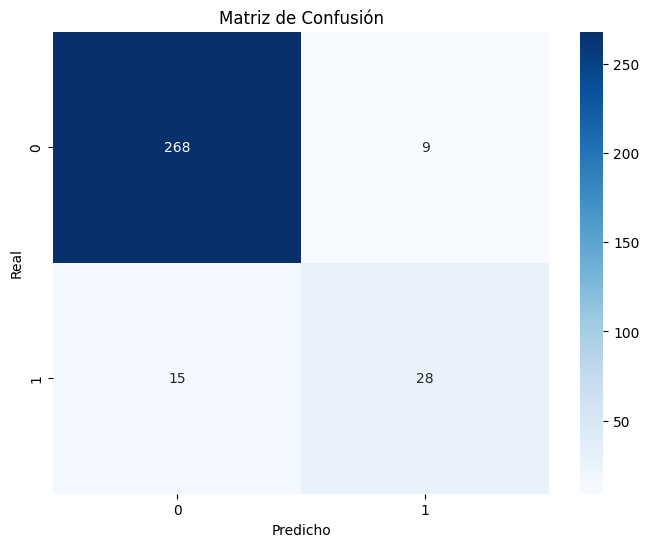

In [20]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Punto 7: Visualización de Resultados

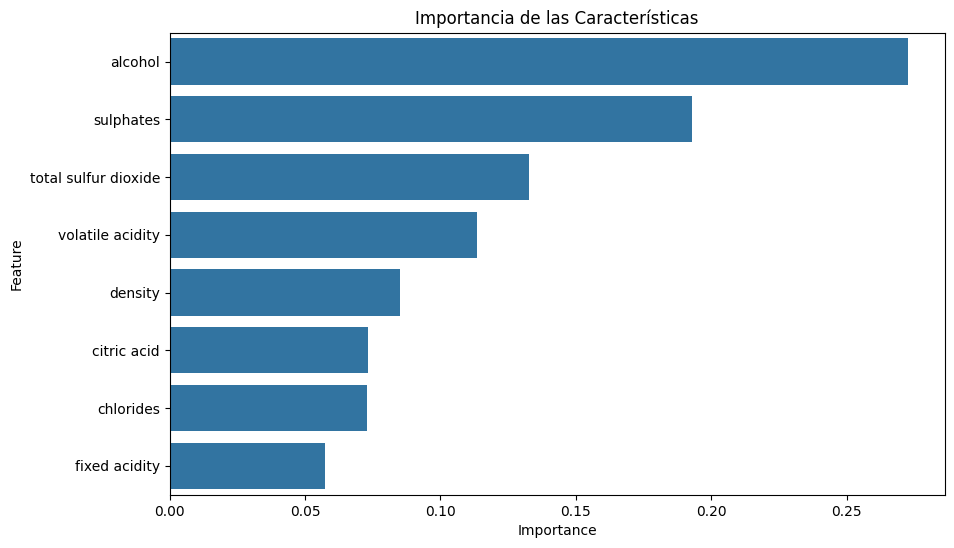

In [21]:
# Importancia de las características
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características')
plt.show()

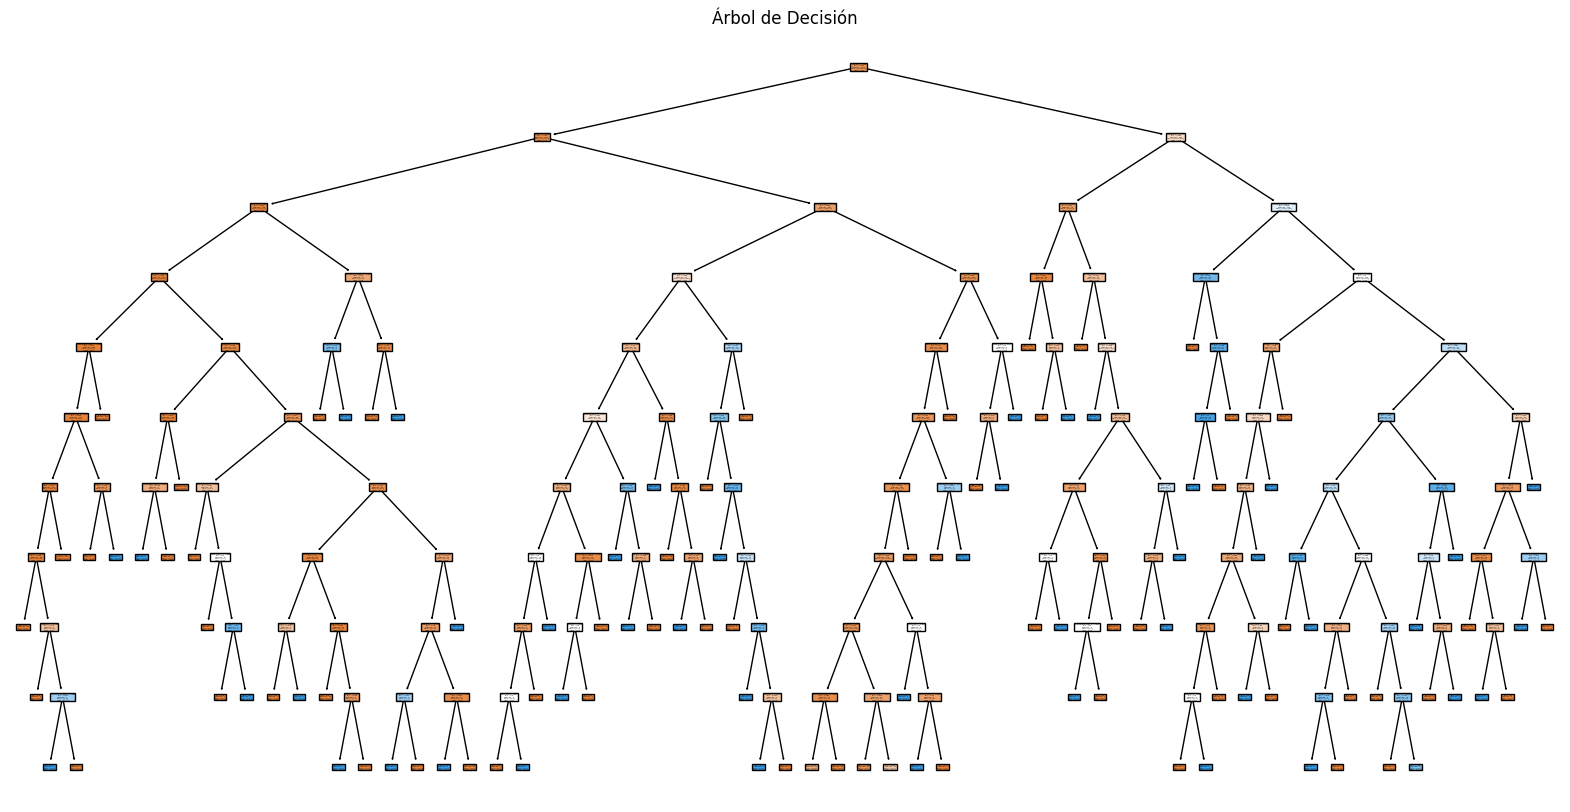

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=selected_features, class_names=['Malo', 'Bueno'], filled=True)
plt.title('Árbol de Decisión')
plt.show()